In [ ]:
AS We Transform to Make Data Normal distributions. 
there are some linear models algorithm which perform ver good on normal distribution data.
such as:- 

👉 Linear models = 
       more sensitive to distribution(Linear Regression,Ridge Regression,Lasso Regression,ElasticNet,Logistic Regression,Bayesian Linear Regression,Perceptron)
       ✅ Key Characteristics:
        Assume linear relationship
        Sensitive to outliers and scaling
        Often need preprocessing (scaling, transformation)
        transformer need in linear models are:-
         StandardScaler,MinMaxScaler,RobustScaler,OneHotEncoder,OrdinalEncoder,,SimpleImputer,
         FunctionTransformer(log transform, reciprocal transform, square, squareroot, custom)
         power transform(box-cox, yeo-jhnson)
         
         
👉 Tree models = distribution doesn’t matter (Decision Tree,Random Forest,Gradient Boosting (GBM, XGBoost, LightGBM, CatBoost))
✅ Key Characteristics:
        Non-parametric → no assumption about data distribution
        Handles skewed data & outliers well
        No need for feature scaling
        Impt:- 
        Transformers You Might Use With Trees:- OneHotEncoder,OrdinalEncoder,SimpleImputer,FunctionTransformer,ColumnTransformer
        don’t need scaling or normalization.
        Transformers → useful for encoding, imputation, feature engineering
        
        

We transform mainly to:
   try to make data linear.
✔ Reduce skewness
✔ Reduce outliers effect
✔ Improve linear relationship
✔ Improve model performance


how to check how data distributed:-
1. sns.displot()
2.pd.skew() -> if its value=0 then data is normal distributed,  if -ve then not normal distributed.
3. QQplot. -> more point on line then it is normal.



Explain different transformer:-
 1. log transform:- we take log of all values. theh it make data near to normal distribution.
     when to apply:- 
     for right skewed
      Only apply positive numeric features (or use log1p)
      Helps linear/parametric models → not needed for tree models
      Can also apply to target variable y if it’s skewed
      
2. reciprocal(1/x) transform:- 


3. xsquare:- 
      for left skwewd data


4, squareroot:-


In [18]:
import pandas as pd
import numpy as np

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer


df = pd.read_csv('../data/train.csv',usecols=['Age','Fare','Survived']) #(using only these column from data)
df.head()
#check missing value
df.isnull().sum()
#handle missing value
df['Age'].fillna(df['Age'].mean(),inplace=True)
df.head()

/var/folders/l5/brjnv_593qdf8cbh4v4ch0840000gn/T/ipykernel_6989/405092447.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(),inplace=True)


,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


/var/folders/l5/brjnv_593qdf8cbh4v4ch0840000gn/T/ipykernel_6989/543600286.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'])


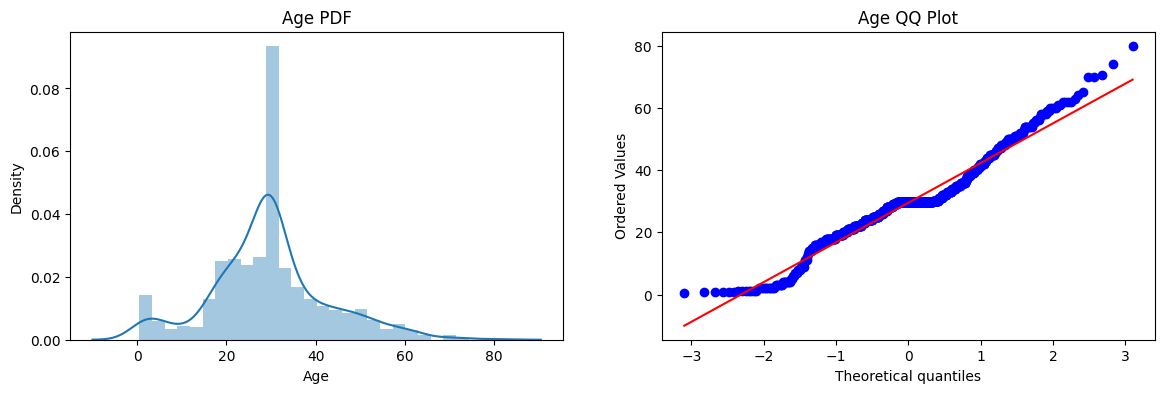

In [20]:
#filter independent value and dependedt value
X = df.iloc[:,1:3]
y = df.iloc[:,0]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)


# check skew for data

plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Age'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(X_train['Age'], dist="norm", plot=plt)
plt.title('Age QQ Plot')

plt.show()

/var/folders/l5/brjnv_593qdf8cbh4v4ch0840000gn/T/ipykernel_6989/2981780686.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Fare'])


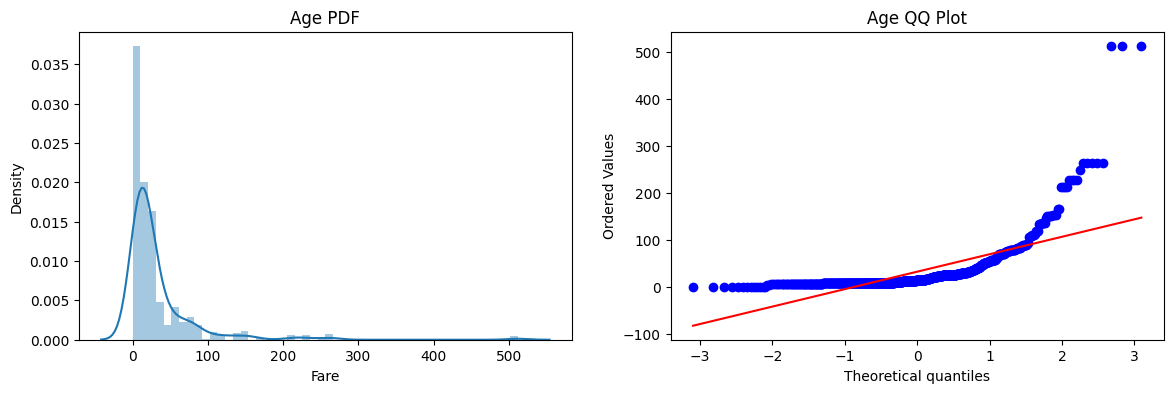

In [ ]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Fare'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(X_train['Fare'], dist="norm", plot=plt)
plt.title('Age QQ Plot')

plt.show()


#It is right swed , we can apply log transformer.

In [22]:
# apply algos 2 differnt
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()


clf.fit(X_train,y_train)
clf2.fit(X_train,y_train)
    
y_pred = clf.predict(X_test)
y_pred1 = clf2.predict(X_test)
    
print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred1))

Accuracy LR 0.6480446927374302
Accuracy DT 0.6703910614525139


In [ ]:
#now apply log transformer
trf = FunctionTransformer(func=np.log1p)

# apply tranformation on train data nd test data.
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.transform(X_test)


# again model created
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

# train data with transfoed data
clf.fit(X_train_transformed,y_train)
clf2.fit(X_train_transformed,y_train)
   
#predict data  
y_pred = clf.predict(X_test_transformed)
y_pred1 = clf2.predict(X_test_transformed)
   
   #check accuracy 
print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred1))


# we can see improvement in LogisticRegression but not in DecisionTreeClassifier because skweness doesn't maater for thsi tress.


Accuracy LR 0.6815642458100558
Accuracy DT 0.6703910614525139


In [ ]:
# apply cross validation for transfom data to validate
X_transformed = trf.fit_transform(X)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,X_transformed,y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,X_transformed,y,scoring='accuracy',cv=10)))


#found correct

LR 0.678027465667915
DT 0.6543695380774032


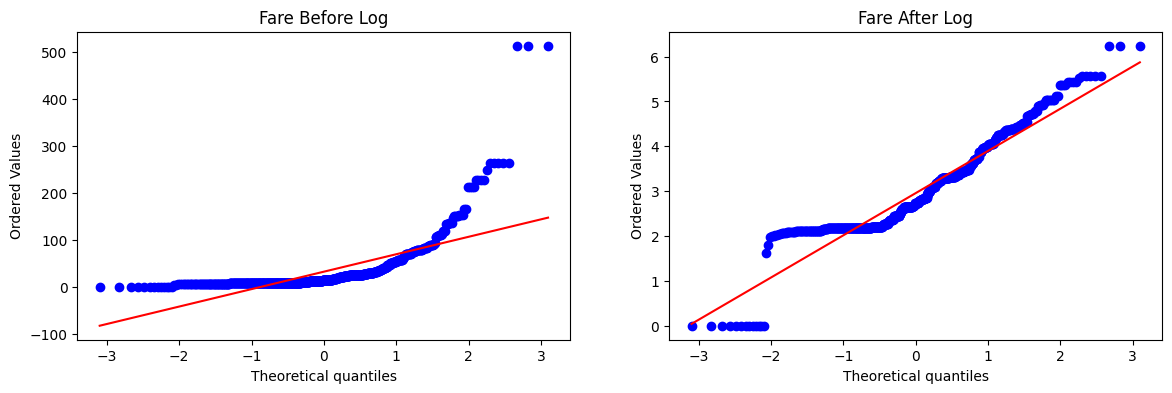

In [ ]:
#check in graph.
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Fare'], dist="norm", plot=plt)
plt.title('Fare Before Log')

plt.subplot(122)
stats.probplot(X_train_transformed['Fare'], dist="norm", plot=plt)
plt.title('Fare After Log')

plt.show()

#fare column is working fine 

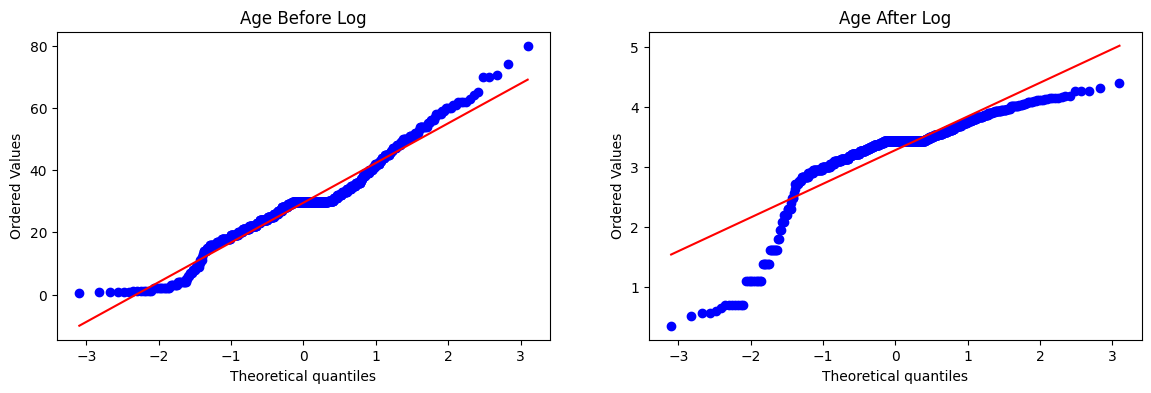

In [ ]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Age'], dist="norm", plot=plt)
plt.title('Age Before Log')

plt.subplot(122)
stats.probplot(X_train_transformed['Age'], dist="norm", plot=plt)
plt.title('Age After Log')

plt.show()


# age column is not working fire, we will try log transfor->

In [27]:
#apply again for fair column
trf2 = ColumnTransformer([('log',FunctionTransformer(np.log1p),['Fare'])],remainder='passthrough')

X_train_transformed2 = trf2.fit_transform(X_train)
X_test_transformed2 = trf2.transform(X_test)


#create model
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

#train
clf.fit(X_train_transformed2,y_train)
clf2.fit(X_train_transformed2,y_train)
   
   #predict 
y_pred = clf.predict(X_test_transformed2)
y_pred2 = clf2.predict(X_test_transformed2)
    
print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred2))

Accuracy LR 0.6703910614525139
Accuracy DT 0.6536312849162011


Accuracy 0.6195131086142323


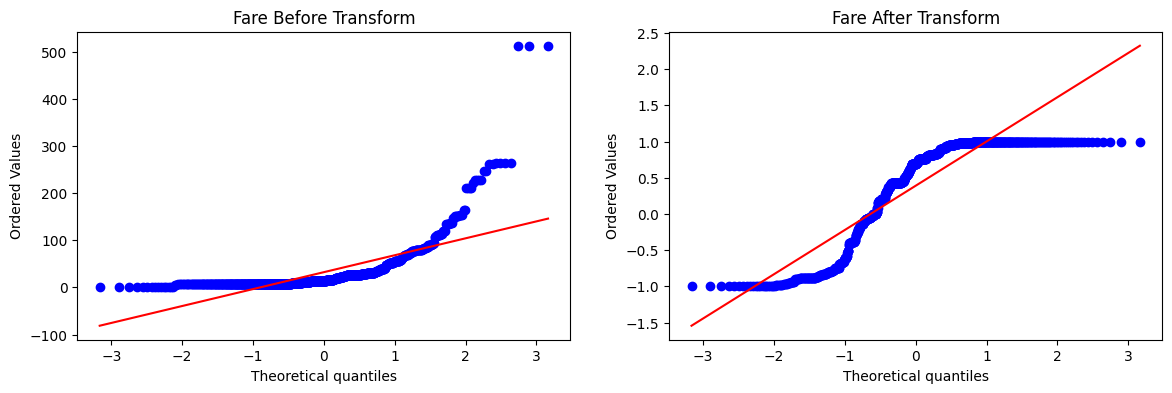

In [ ]:
#create function to apply different transform

def apply_transform(transform):
    X = df.iloc[:,1:3]
    y = df.iloc[:,0]
    
    trf = ColumnTransformer([('log',FunctionTransformer(transform),['Fare'])],remainder='passthrough')
    
    X_trans = trf.fit_transform(X)
    
    clf = LogisticRegression()
    
    print("Accuracy",np.mean(cross_val_score(clf,X_trans,y,scoring='accuracy',cv=10)))
    
    plt.figure(figsize=(14,4))

    plt.subplot(121)
    stats.probplot(X['Fare'], dist="norm", plot=plt)
    plt.title('Fare Before Transform')

    plt.subplot(122)
    stats.probplot(X_trans[:,0], dist="norm", plot=plt)
    plt.title('Fare After Transform')

    plt.show()
    
    
    # call function to check with different try different transform
apply_transform(np.sin)  # we can change differnt values like log transform->np.log1p, reciprocal transform-> lambda x: 1/x, square->x^2, squareroot-> √x to check in which working fine.